In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
file_path = '/Users/jinishakande/Desktop/BUSPARK/data1.csv'
data = pd.read_csv(file_path)

In [35]:
columns = data.columns
for column in columns:
    print(column)


createdat
iotid
hide
bin
errorcode
weight
battery
updatedat
weightdiff
year
month
day


In [36]:
data.head(10)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2
5,2023-01-02 16:50:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.627756,2023-01-02 16:50:00.000,NaN,2023,1,2
6,2023-01-02 17:00:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2592.507820,2023-01-02 17:00:00.000,NaN,2023,1,2
7,2023-01-02 18:06:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 18:06:00.000,NaN,2023,1,2
8,2023-01-02 18:17:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2593.423362,2023-01-02 18:17:00.000,NaN,2023,1,2
9,2023-01-02 18:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2593.118181,2023-01-02 18:30:00.000,NaN,2023,1,2


In [37]:
total_rows = data.shape[0]
print(f'Total number of rows in the dataset: {total_rows}')

Total number of rows in the dataset: 26979124


In [44]:
duplicates = data[data.duplicated(subset=['weight'])]

# Print the duplicate rows
print(duplicates)


                        createdat        iotid   hide  \
1         2023-01-02 13:02:00.000  lora-000060  False   
2         2023-01-02 13:53:00.000  lora-000060  False   
3         2023-01-02 16:30:00.000  lora-000060  False   
4         2023-01-02 16:39:00.000  lora-000060  False   
5         2023-01-02 16:50:00.000  lora-000060  False   
...                           ...          ...    ...   
26979119  2023-02-02 05:12:00.000  lora-000843  False   
26979120  2023-02-02 11:59:00.000  lora-000843  False   
26979121  2023-02-02 18:01:00.000  lora-000843  False   
26979122  2023-02-02 09:20:00.000  lora-000328  False   
26979123  2023-02-02 23:52:00.000  lora-000328  False   

                                           bin errorcode        weight  \
1         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
2         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
3         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
4         95171614-

In [46]:
data['is_duplicate'] = data.duplicated(subset=['weight'])
print(data['is_duplicate'])

0           False
1            True
2            True
3            True
4            True
            ...  
26979119     True
26979120     True
26979121     True
26979122     True
26979123     True
Name: is_duplicate, Length: 26979124, dtype: bool


In [48]:
aggregated_data = data.groupby('weight').agg({'battery': 'mean', 'weightdiff': 'mean'})
print(aggregated_data)

                    battery  weightdiff
weight                                 
-100000.000000  2748.227603         NaN
-99987.792782   2648.966201         NaN
-99899.290455   2992.446784         NaN
-99771.114672   2648.203250         NaN
-99746.700237   2837.109941         NaN
...                     ...         ...
 94760.051881   3063.401236         NaN
 94784.466316   3063.401236         NaN
 95312.428473   3045.548180         NaN
 95318.532082   3045.548180         NaN
 100000.000000  2865.670495         NaN

[22159 rows x 2 columns]


In [30]:
duplicates = data[data.duplicated(subset=['bin', 'iotid', 'year', 'month', 'day'])]
print(duplicates)

                        createdat        iotid   hide  \
1         2023-01-02 13:02:00.000  lora-000060  False   
2         2023-01-02 13:53:00.000  lora-000060  False   
3         2023-01-02 16:30:00.000  lora-000060  False   
4         2023-01-02 16:39:00.000  lora-000060  False   
5         2023-01-02 16:50:00.000  lora-000060  False   
...                           ...          ...    ...   
26979119  2023-02-02 05:12:00.000  lora-000843  False   
26979120  2023-02-02 11:59:00.000  lora-000843  False   
26979121  2023-02-02 18:01:00.000  lora-000843  False   
26979122  2023-02-02 09:20:00.000  lora-000328  False   
26979123  2023-02-02 23:52:00.000  lora-000328  False   

                                           bin errorcode        weight  \
1         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
2         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
3         95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135   
4         95171614-

In [39]:
# Find the total number of duplicate rows in the entire dataset
total_duplicates = data.duplicated().sum()

# Print the total number of duplicates
print(f'Total number of duplicate rows: {total_duplicates}')


Total number of duplicate rows: 11684870


In [56]:
total_rows = data.shape[0]
print(f'Total number of rows in the dataset: {total_rows}')

Total number of rows in the dataset: 26979124


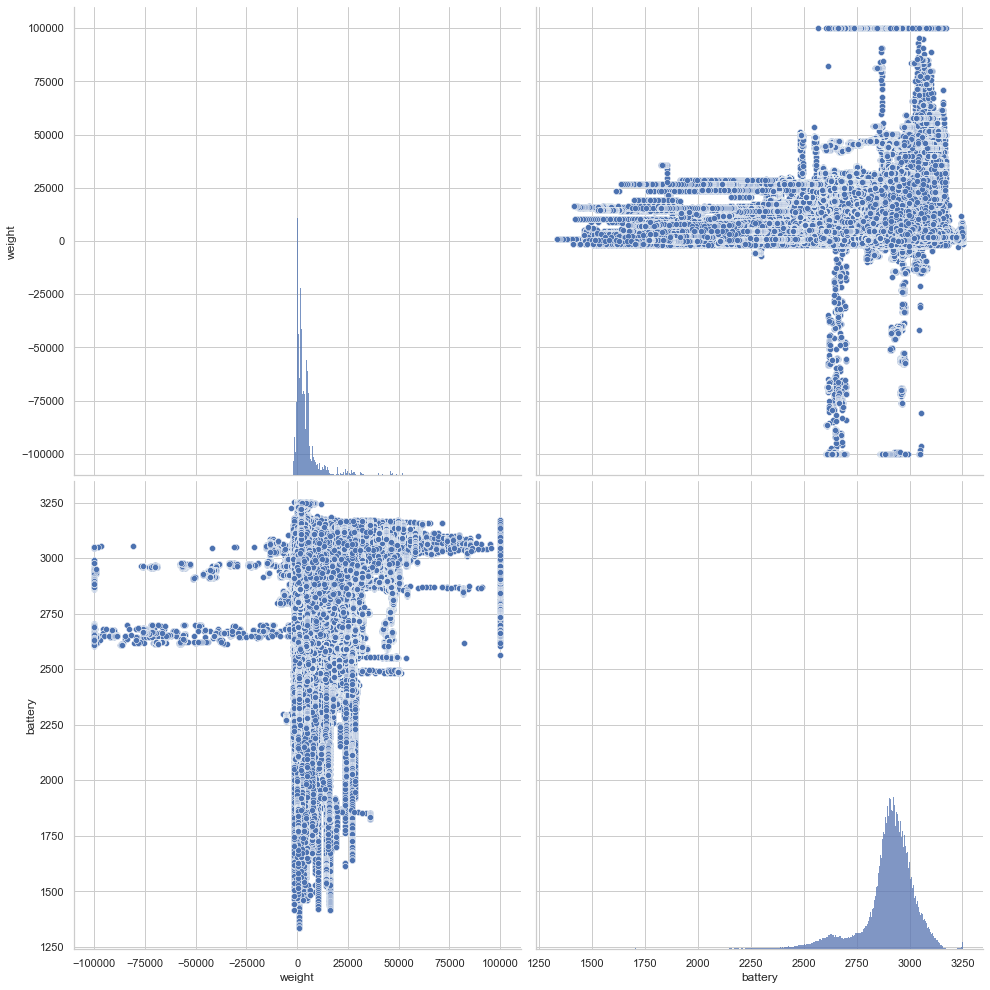

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.pairplot(data, vars=["weight", "battery"], height=7)
plt.show()


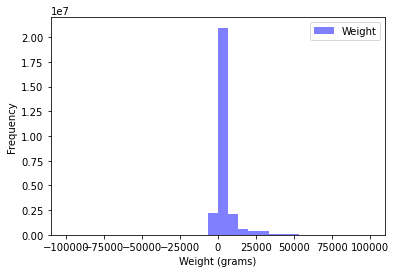

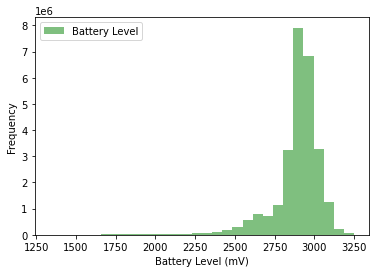

In [50]:
import matplotlib.pyplot as plt

# Plot histogram for the 'weight' column
plt.hist(data['weight'], bins=30, alpha=0.5, color='b', label='Weight')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for the 'battery' column
plt.hist(data['battery'], bins=30, alpha=0.5, color='g', label='Battery Level')
plt.xlabel('Battery Level (mV)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [60]:

errorcode_counts = data['errorcode'].value_counts()

no_error_percentage = (errorcode_counts.get('NO_ERROR', 0) / len(data)) * 100

print(f'Value counts of error codes:\n{errorcode_counts}')
print(f'Percentage of "NO_ERROR" records: {no_error_percentage:.2f}%')


Value counts of error codes:
NO_ERROR        26763900
OUT_OF_RANGE      201405
UNSTABLE           13819
Name: errorcode, dtype: int64
Percentage of "NO_ERROR" records: 99.20%
